# Welcome. Wilkommen. Καλώς ορίσατε.

In [1]:
# Define those import-ant things. Haha. I'm hilarious.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import time
from PIL import Image

In [2]:
def preprocess_df(df):
    '''
    Takes in a object
    defines a translator to remove punctuation and spaces
    Runs object through translator to remove punctuation and spaces, makes all lowercase, removes any extra whitespace for good meature 
    If object is a pandas DataFrame, will only process the 'name' column
    Else will assume is a list, and do it all
    Returns the dataframe
    '''
    translator = str.maketrans('', '', string.punctuation + ' ')
    df.name = df.name.str.lower().str.translate(translator).str.strip()
   
    return df

In [3]:
# Define default colors, in case of no input or for use later if not enough mutual colors
default_colors = ['white', 'black', 'red', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']

def get_colors():
    '''
    Function that gets a list of colors from the user, and processes the text
    If nothing is inputted, defaults to a list of colors:
    ['white', 'black', 'red', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']
    '''
    # Specify default list of colors
    # Get color list by input
    words = input('What word(s) do you want to search for (separated by commas) [defaults to list of colo(u)rs]: ')
    # Process words if inputted
    if words != '':
        color_list = [word.strip().lower() for word in words.split(',')]
        translator = str.maketrans('', '', string.punctuation + ' ')
        color_list = [word.translate(translator) for word in color_list]
    # Else default to list of colors
    else:
        color_list = default_colors
    return(color_list)

### 1. Takes as input argument a single or a list colour terms with the following default list of 14 words for consistency: white, black, red, yellow, green, blue, brown, purple, orange, pink, lorem, ipsum.

In [4]:
# use function defined above to ask user for colors, clean the text, use default list if no input
list_of_colors = get_colors()
# show list after cleaning
print(list_of_colors)

What word(s) do you want to search for (separated by commas) [defaults to list of colo(u)rs]: 
['white', 'black', 'red', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']


### 2. Loads a dataset from an online experiment (from colournaming.org and accessible on Canvas) that consists of thousands of colour naming responses mapped to RGB triplets by thousands of participants. Note that each colour term in this dataset is assigned to multiple RGB colour values.

In [5]:
# read 'colour_naming_data.csv' from current directory, and then we quit using the British spelling
color_naming = pd.read_csv('colour_naming_data.csv', skiprows=1, names = ['sample_id', 'name', 'R', 'G', 'B'])
# show a sample of our new DataFrame
color_naming.sample(5)

,sample_id,name,R,G,B
3519,582,lilac,207,100,254
1233,542,purple,178,21,136
3561,315,blue,0,168,158
1334,503,bright purple,83,48,156
4350,229,baby blue,114,185,211


### 3. Prepare the raw data for analysis by making consistent the case of all letters and removing punctuations marks and unnecessary white spaces.

In [6]:
# Clean text
color_naming = preprocess_df(color_naming)
# Show new sample
color_naming.sample(5)

,sample_id,name,R,G,B
2956,511,orange,219,68,53
3665,514,blue,90,115,218
3547,285,purpleblue,99,88,148
491,17,greygreen,10,31,33
787,432,cottoncandypink,218,153,218


### 5. Loads the X11 reference colour list (available on Canvas), cleans the data (e.g., makes consistent the letter case, removes duplicates). Creates a dictionary where each colour word is a key paired with a single RGB triplet of colour values and checks if the colour words given as an input in step a) exist in the X11 dictionary.

In [7]:
# Read in x11 color data from './rgb_x11.csv'
x11 = pd.read_csv('rgb_x11.csv', sep=",", header=None, names=['R', 'G', 'B', 'name'], skiprows=1)
x11.sample(5)

,R,G,B,name
558,28,28,28,gray11
619,105,105,105,grey41
552,20,20,20,gray8
210,221,160,221,plum
151,250,250,210,light goldenrod yellow


In [8]:
# Cleans x11 csv text
x11 = preprocess_df(x11)

# Removes duplicate values by 'name'
x11 = x11.drop_duplicates()

# Makes a dictionary from DataFrame k:v = color, list of rgb
x11_dict = x11.set_index('name').T.to_dict('list')

### 4. Checks if the colour words given as an input in a) exist in the clean dataset and if so, computes the averaged RGB triplet for each term, if not, Bob informs Alice that does not know this colour word.

#### 4. Got moved down so we can make sure that the colors exist in both sets, or it uses default list

In [9]:
# Get a list of which colors are in both sets, making sure we have enough for a comparison
colors_everywhere = list(set(list_of_colors) & set(color_naming['name']) & set(x11['name']))

# If not enough for a comparison, use default list of colors and rebuild colors_everywhere
if bool(colors_everywhere) == False:
    print("Not enough mutual colors to run comparison. Using default values of:")
    list_of_colors = default_colors
    print(list_of_colors)
    colors_everywhere = list(set(list_of_colors) & set(color_naming['name']) & set(x11['name']))

In [10]:
# Initialize or reset dictionary of color means
color_means = {}
# Initialize or reset list for unknown colors
unknown_colors = []

# Loop through list_of_colors to get mean RGB values of each color from list
for color in list_of_colors:
    #If color is in the the ['name'] column of 'color_naming' DataFrame
    if color in color_naming.name.values:
        # create new temp DataFrame of just that color
        color_df = color_naming[color_naming['name'] == color]
        # Create list of means, from the DataFrame RGB values (slicing off the first sample_id)
        color_mean = color_df.mean().tolist()[1:]
        # Create new key in color_means dictionary with the value of list 'color_mean'
        color_means[color] = color_mean
        # Print findings for each color
        print("{}: {}".format(color, color_mean))
    # If color is NOT in our DataFrame
    else:
        # Append color to list of unknown colors
        unknown_colors.append(color)

# Print out unknown colors if there are any
if unknown_colors == False:
    print("I do not know these colors: {}".format(unknown_colors))

white: [227.9047619047619, 221.16666666666666, 229.78571428571428]
black: [28.065573770491802, 24.21311475409836, 27.80327868852459]
red: [181.14285714285714, 36.25, 49.964285714285715]
yellow: [223.58947368421053, 201.93684210526317, 68.25263157894737]
green: [79.32367149758454, 150.8743961352657, 87.68599033816425]
blue: [73.44131455399061, 105.48826291079813, 185.77464788732394]
brown: [111.17857142857143, 67.10714285714286, 36.67857142857143]
purple: [119.84386617100371, 55.44981412639405, 146.18215613382898]
orange: [219.21978021978023, 124.20879120879121, 54.75824175824176]
pink: [220.5, 111.97457627118644, 174.73728813559322]


In [11]:
# initialize list for colors not in x11
unknown_color_x11 = []
# iterate through and find ones that are not x11, append to list
for color in list_of_colors:
    if color not in x11_dict:
        unknown_color_x11.append(color)

print("These colors are not in the X11 data: {}".format(unknown_color_x11))

These colors are not in the X11 data: ['lorem', 'ipsum']


6. Measures the Euclidean distance between the reported mean RGB triplet of each known word given as an input in a) and computed in d) against the corresponding reference RGB triplet for this term in X11 dictionary created in e). Bob also measures the time required to perform these comparisons.

In [12]:
# Create list of colors that are in X11, but NOT color_naming

# Create new data frame of all, left-merging color_naming (right) on to x11 (left)
colors_all = x11.merge(color_naming, on=['name'], how='left', indicator=True)

# make new df of colors merged as noted being in ONLY the left (x11)
colors_left_only = colors_all[colors_all['_merge'] == 'left_only']

# Make list of those colors
x11_only_colors = colors_left_only['name'].values.tolist()

In [13]:
# Initliaze/reset dictionary to hold euclidian distance measurements
eu_dist_dict = {}

# sets the start time in from perf_counter, to time function
start = time.perf_counter()
# Iterate though the k,v in color_means dict
for color, mean in color_means.items():
    # If color is only in x11 sheet, cannot make comparison
    if color in x11_only_colors:
        print("'{}' only in x11 database. Cannot compare Euclidian distance.".format(color))
    elif color in unknown_color_x11:
        print("'{}' only in 'colour_naming' database. Cannot compare Euclidian distance.".format(color))
    # If color in both, carry on
    else:
        # Use numpy to get the euclidian distance between the mean and the x11 definition, turning our lists into np arrays
        eu_dist = np.linalg.norm(np.array(mean) - np.array(x11_dict[color]))
        # Add to dictionary
        eu_dist_dict[color] = eu_dist

# Sets end time using perf_counter
end = time.perf_counter()

# Make df of dictionary for prettiness
eu_dist_df = pd.DataFrame.from_dict(eu_dist_dict, orient='index', columns=['euclidian distance'])
# Show df
eu_dist_df

,euclidian distance
white,50.145853
black,46.335447
red,96.256791
yellow,91.982290
green,157.553861
blue,145.991608
brown,59.627447
purple,104.710060
orange,77.088338
pink,91.613860


7. Produces a performance report that consists of:
- Text including the number of known colour words in the given default word list and the time required to run the Euclidean distance calculation for all known words.




In [14]:
print("Hey there. Here are the words you chose that are in both datasets (so we're able to compare):")
print(colors_everywhere)
print("The Euclidian distance calculations took {}ms".format((end-start)*1000))

Hey there. Here are the words you chose that are in both datasets (so we're able to compare):
['green', 'red', 'blue', 'orange', 'black', 'pink', 'brown', 'white', 'yellow', 'purple']
The Euclidian distance calculations took 1.929099999999906ms


- A bar plot with the Euclidean distances between mean and reference colour values for each known colour word of the given default word list.

In [15]:
# Make a hex dict of x11 colors, so that we can plot the colors appropriately on the bar chart, but it won't break if it's not a matplotlib named color
x11_dict_hex = {}
for color, value in x11_dict.items():
    x11_dict_hex[color] = '#%02x%02x%02x' % tuple(value)

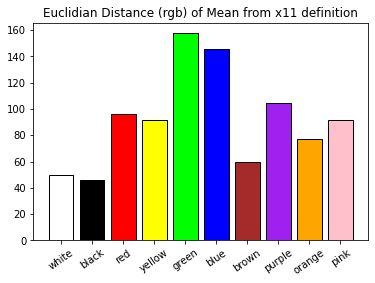

In [16]:
# Rotate these badbois 35 degrees, because it's so jam-packed with goodness
plt.xticks(rotation=35)

# make a bar plot with the euclidian distance keys (colors) and values (distances)
# color it using the hex dictionary so it doesn't break for weird colors, list comprehension to grab the colors
# edgecolor it black because of the whites ruin everything

plt.bar(eu_dist_dict.keys(), eu_dist_dict.values(), color = [x11_dict_hex[color] for color in eu_dist_dict.keys()], edgecolor = 'black')
plt.title('Euclidian Distance (rgb) of Mean from x11 definition')
plt.show()

In [17]:
# From our list_of_colors, only include words that exist both in the color_naming and x11
print(colors_everywhere)

['green', 'red', 'blue', 'orange', 'black', 'pink', 'brown', 'white', 'yellow', 'purple']


- An RGB image for each colour word where the top-half is coloured using the reference X11 RGB triplet and the bottom-half is coloured using the averaged RGB triplet of Bob for visual assessment of the numerical distances.

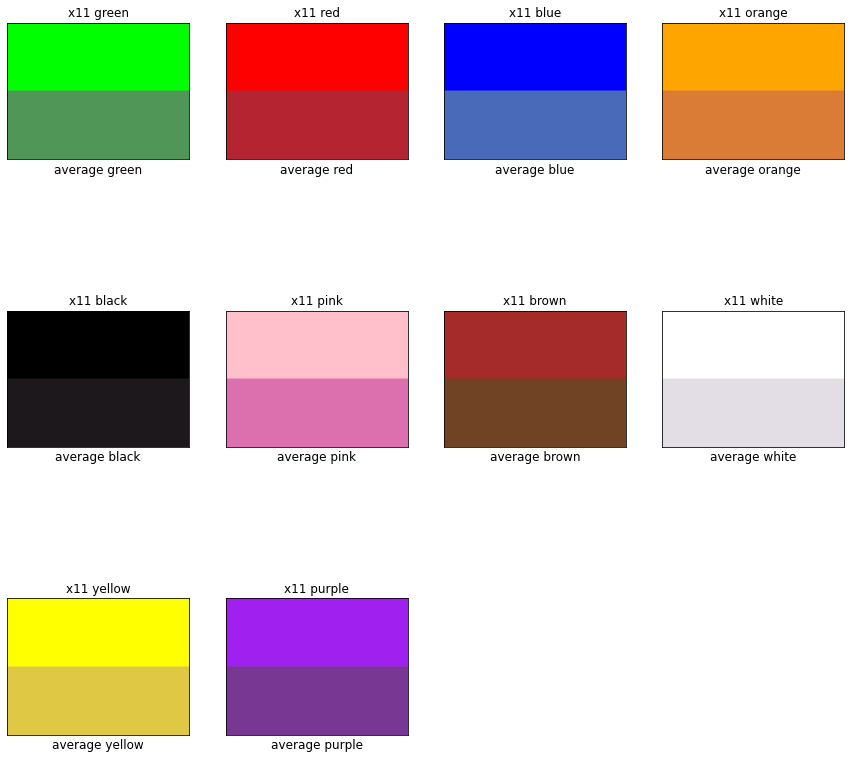

In [18]:
# Get a plot going
fig = plt.figure(figsize=(15, 15))
# Set columns to show subplots, 4 seems nice for this
columns = 4
# Set the amount of rows to always be big enough to handle the size of the list, divided into 4 columns
rows = (int(len(colors_everywhere)/4)+1)

# start building out subplots using range to know where to place them
for i in range(1, len(colors_everywhere) + 1):
    # get the color we're working with via list index
    color = colors_everywhere[i-1]
    # initalize the color flag as a 640x480x3 numpy array with an RGB value for every pixel in a 2D 640x480 flag
    flag = np.zeros([480, 640, 3], dtype=np.uint8)
    # replace the top half with the x11 RGB definition of that color
    flag[:240,:,:] = x11_dict[color]
    # replace the bottom half with our calculated average means
    flag[240:,:,:] = color_means[color]
    # use PIL to turn our np arrays into an image
    img = Image.fromarray(flag)
    # add it to the subplot one in position one after the other
    fig.add_subplot(rows, columns, i)
    # make a title for the flag, set fontsize to 12 so it can be uniform
    plt.title("x11 " + color, fontsize = 12)
    # pretend xlabel is a title underneath, set to a uniform fontsize
    plt.xlabel("average " + color, fontsize = 12)
    # set tick parameters so we can hide the ticks and axes, but still have the xlabel
    plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    # make it so
    plt.imshow(img)

#make it show
plt.show()

- Text including the result of an automatic test in which the mean Euclidean distance should be equal to 92 units for the given default list of words.

In [19]:
# Define a very definitive variable name and make it equal to the mean of all EuDist means
my_euclidean_distance_mean_to_check_against_this_assertion = eu_dist_df.mean()

# Make a function to check if my answer is 92
def check_mean(mean_to_check):
    # Define variable to check, round it
    r_mean = int(round(mean_to_check))
    # Assert AND MEAN IT that the answer SHOULD BE 92
    assert (r_mean == 92), 'It should be 92'
    # If correct, proclaim the truth
    return "You're a genius. Your Euclidian distance is {} (approximately).".format(r_mean)

# Only run the above function if the list of colors is the default list, because it's what we have the assertion for
if list_of_colors == default_colors:
    print(check_mean(my_euclidean_distance_mean_to_check_against_this_assertion))
else:
    print("Can only check assertion when using default colors.")

You're a genius. Your Euclidian distance is 92 (approximately).


- Text including the unknown colour words, if any, in the given default list of words.

In [20]:
print("WE DON'T KNOW WHAT THESE WORDS ARE: {}".format(unknown_colors))

WE DON'T KNOW WHAT THESE WORDS ARE: ['lorem', 'ipsum']


8. Your final notebook must also include a brief section where you reflect on the ethical implications of your data and analysis. Reflect also on the scientific integrity of the study design, potential unintended consequences of your data and analysis, and the human and social context of data science more broadly. For example, what are the potential consequences if your conclusion is wrong? Your ethics reflections should be one paragraph or slightly longer if needed.

This is the FINAL NOTE-BOOK, deee nee neeee neeeeee. Di-ni-NEE-nih-neee. Dee-nuh-NEE-neee. And so on.

The ethical implications of my data are monstrous. Colossal.

Hey, you included the x11 license in with your .csv file. So let's talk about some other similar issues going on right now.

TikTok was recently (like 2021-12-18) accused of using some code from OBS in their new streaming software. They can't do that. OBS is GPL code, so anything that uses it must share their source alike. You know whose source code isn't available? OMGeeze, you guessed it: TikTok's new PC streaming app. It's already hard enough being OBS, and the fact that all these companies, organizations, and projects allow people to not only use their software for free, but fork it and make their own projects with it... a boon, a charity, a hope for humanity. When private companies come in and steal a bit of it so increase their market share and profit? That's not so good.

There are no potential consequences if my conclusion is wrong about the mean of the euclidian distance of the default set of colors. The implications of a copyright issue like this going up against an increasingly hostile and right-wing set of "final courts", that could be huge. I wonder who is gonna pursue it.